## MÉTODOS ESTOCÁSTICOS EN RECURSOS HIDRÁULICOS
### Sthochastic Methods in Water Resources
### 2024 – 1S
### Ejercicio 05 – Series de Tiempo A

In [154]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sm
import statsmodels.graphics.tsaplots as tsp
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from PyEMD import EMD
import scipy.stats as stats
from scipy.stats import mannwhitneyu

Leer los datos en un dataframe

In [2]:
df = pd.read_csv("SMWR_Lebrija (1).txt",names=['Caudal'])
df.head()

Caudal
0   100.3
1    96.4
2    95.2
3   108.9
4   173.2

Ya cargados los caudales agregar la fecha 

In [3]:
# Crear un rango de fechas que comience en el año 2000
dates = pd.date_range(start='2000-01-01', periods=len(df), freq='D')

In [4]:
dates 

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', length=7432, freq='D')

In [5]:
# Asignar la columna de fechas a la columna 'Fecha'
df['Fecha'] = dates

In [6]:
df.head()

Caudal      Fecha
0   100.3 2000-01-01
1    96.4 2000-01-02
2    95.2 2000-01-03
3   108.9 2000-01-04
4   173.2 2000-01-05

ver su informacion   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Caudal  7432 non-null   float64       
 1   Fecha   7432 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 116.2 KB


Ahora sus estadisticos 

In [8]:
df.describe()

Caudal                Fecha
count  7432.000000                 7432
mean     93.784977  2010-03-04 12:00:00
min       2.300000  2000-01-01 00:00:00
25%      48.000000  2005-01-31 18:00:00
50%      70.533953  2010-03-04 12:00:00
75%     111.600000  2015-04-05 06:00:00
max     549.600000  2020-05-06 00:00:00
std      72.991680                  NaN

Para la serie de caudales medios diarios del Río Lebrija (archivo adjunto) se le pide:
1. Agregar la serie a:
* a. Caudales medios mensuales
* b. Caudales medios anuales
* c. Caudales medios mensuales multianuales

Para realizar este punto crremos una columna año y mes  

In [9]:
# Crear una columna 'Mes' con el mes de la columna 'Fecha'
df['Mes'] = df['Fecha'].dt.month

# Crear una columna 'Año' con el año de la columna 'Fecha'
df['Año'] = df['Fecha'].dt.year

In [10]:
df.head()

Caudal      Fecha  Mes   Año
0   100.3 2000-01-01    1  2000
1    96.4 2000-01-02    1  2000
2    95.2 2000-01-03    1  2000
3   108.9 2000-01-04    1  2000
4   173.2 2000-01-05    1  2000

a. Caudales medios mensuales


In [11]:

# Agrupar los datos por mes y año, y obtener la media del caudal
media_mensual = df.groupby(["Mes","Año"])["Caudal"].sum().reset_index()
media_mensual.rename(columns={"Caudal": "Caudal medio mensual"},inplace=True)
media_mensual

Mes   Año  Caudal medio mensual
0      1  2000           3118.400000
1      1  2001           2474.400000
2      1  2002            926.500000
3      1  2003            707.100000
4      1  2004           2393.300000
..   ...   ...                   ...
240   12  2015            489.468750
241   12  2016           6479.344063
242   12  2017           5865.640000
243   12  2018           1669.499000
244   12  2019           2013.640375

[245 rows x 3 columns]

b. Caudales medios anuales

Para esto se suma por año el caudal mensual 

In [12]:
media_anual = media_mensual.groupby("Año").sum().reset_index()
media_anual.rename(columns={"Caudal medio mensual": "Caudal medio anual"},inplace=True)
media_anual.drop("Mes",axis=1,inplace=True)
media_anual

Año  Caudal medio anual
0   2000        38983.600000
1   2001        37486.600000
2   2002        22979.400000
3   2003        33079.500000
4   2004        28036.700000
5   2005        34884.540000
6   2006        26713.100000
7   2007        27893.120000
8   2008        36544.160000
9   2009        34807.470000
10  2010        56409.120000
11  2011        57021.260000
12  2012        32584.920000
13  2013        33132.010000
14  2014        25721.120000
15  2015        16262.685000
16  2016        24688.773958
17  2017        54905.580208
18  2018        37604.283031
19  2019        23930.633896
20  2020        13341.376032

c. Caudales medios mensuales multianuales

Para esto se saca la media para cada mes multianual

In [13]:
# Agrupar los datos por mes y obtener la media del caudal
media_mensual_multianual = media_mensual.groupby(["Mes"]).mean()["Caudal medio mensual"].reset_index()
media_mensual_multianual.rename(columns={"Caudal medio mensual": "Caudal medio mensual multianual"}
                                ,inplace=True)
media_mensual_multianual

Mes  Caudal medio mensual multianual
0     1                      2005.215311
1     2                      2024.162369
2     3                      2913.615510
3     4                      3415.756618
4     5                      3364.551862
5     6                      2459.734245
6     7                      2416.864223
7     8                      2460.378557
8     9                      3053.047779
9    10                      4216.138409
10   11                      3474.087031
11   12                      2360.780609

2. Realizar la estimación de los estadísticos o momentos de cada una de las 4 series.
* a. Media
* b. Varianza y desviación estándar
* c. Coeficiente de Variación
* d. Coeficiente de Asimetría
* e. Coeficiente de Curtosis
* f. Covarianza y Correlación
* g. Autocorrelación (ACF) y Autocorrelación parcial (PACF)
* h. La función de densidad espectral (PSD)

a. Media
Serie diaria de caudal 

In [14]:
media1 = df["Caudal"].mean()
print(f"La media del caudal de la serie diaria es {media1:.2f}")

La media del caudal de la serie diaria es 93.78


Media Caudal medio mensual

In [15]:
media2 = media_mensual["Caudal medio mensual"].mean()
print(f"La media del caudal medio mensual es {media2:.2f}")

La media del caudal medio mensual es 2844.94


Media Caudal medio anual

In [16]:
media3 = media_anual["Caudal medio anual"].mean()
print(f"La media del caudal medio mensual es {media3:.2f}")

La media del caudal medio mensual es 33190.95


Media Caudal medio mensual multianual 

In [17]:
media4 = media_mensual_multianual["Caudal medio mensual multianual"].mean()
print(f"La media del caudal medio mensual multianulas es {media4:.2f}")


La media del caudal medio mensual multianulas es 2847.03


b. Varianza y desviación estándar

Serie diaria de caudal

In [18]:
var1 = df["Caudal"].var()
std1 = df["Caudal"].std()
print(f"La varianza del caudal de la serie diaria es {var1:.2f}")
print(f"La std del caudal de la serie diaria es {std1:.2f}")

La varianza del caudal de la serie diaria es 5327.79
La std del caudal de la serie diaria es 72.99


Serie Caudal medio mensual

In [19]:
var2 = media_mensual["Caudal medio mensual"].var()
std2 = media_mensual["Caudal medio mensual"].std()
print(f"La varianza del caudal medio mensual es {var2:.2f}")
print(f"La std del caudal medio mensual es {std2:.2f}")

La varianza del caudal medio mensual es 2496078.82
La std del caudal medio mensual es 1579.90


Serie Caudal medio anual

In [20]:
var3 = media_anual["Caudal medio anual"].var()
std3 = media_anual["Caudal medio anual"].std()
print(f"La varianza del caudal medio anual es {var3:.2f}")
print(f"La std del caudal medio anual es {std3:.2f}")

La varianza del caudal medio anual es 138118394.12
La std del caudal medio anual es 11752.38


Serie Caudal medio mensual multianual

In [21]:
var4 = media_mensual_multianual["Caudal medio mensual multianual"].var()
std4 = media_mensual_multianual["Caudal medio mensual multianual"].std()
print(f"La varianza del caudal medio mensual multianula es {var4:.2f}")
print(f"La std del caudal medio mensual multianula es {std4:.2f}")

La varianza del caudal medio mensual multianula es 455686.88
La std del caudal medio mensual multianula es 675.05


c. Coeficiente de Variación

Serie diaria de caudal

In [22]:
print(f"El coeficiente de variacion del caudal de la serie diaria es {std1/media1:.2f}")

El coeficiente de variacion del caudal de la serie diaria es 0.78


Serie Caudal medio mensual

In [23]:
print(f"El coeficiente de variacion del caudal medio mensual es {std2/media2:.2f}")

El coeficiente de variacion del caudal medio mensual es 0.56


Serie Caudal Caudal medio anual

In [24]:
print(f"El coeficiente de variacion del caudal medio anual es {std3/media3:.2f}")

El coeficiente de variacion del caudal medio anual es 0.35


Serie Caudal medio mensual multianual

In [25]:
print(f"El coeficiente de variacion del caudal medio mensual  multianual es {std4/media4:.2f}")

El coeficiente de variacion del caudal medio mensual  multianual es 0.24


d. Coeficiente de Asimetría

Serie diaria de caudal

In [26]:
asimetria1 = df['Caudal'].skew()
print(f"El coeficiente de asimetría del caudal de la serie diaria es {asimetria1:.2f}")

El coeficiente de asimetría del caudal de la serie diaria es 2.02


Serie Caudal medio mensual

In [27]:
asimetria2 = media_mensual["Caudal medio mensual"].skew()
print(f"El coeficiente de asimetría del caudal medio mensual es {asimetria2:.2f}")

El coeficiente de asimetría del caudal medio mensual es 1.40


Serie Caudal medio anual

In [28]:
asimetria3 = media_anual["Caudal medio anual"].skew()
print(f"El coeficiente de asimetría del caudal medio anual es {asimetria3:.2f}")

El coeficiente de asimetría del caudal medio anual es 0.70


Serie Caudal medio mensual multianual

In [29]:
asimetria4 = media_mensual_multianual["Caudal medio mensual multianual"].skew()
print(f"El coeficiente de asimetría del caudal medio mensual mulanual es {asimetria4:.2f}")

El coeficiente de asimetría del caudal medio mensual mulanual es 0.60


e. Coeficiente de Curtosis

Serie diaria de caudal

In [30]:
curtosis1 = df['Caudal'].kurtosis()
print(f"El coeficiente de curtosis del caudal de la serie diaria es {curtosis1:.2f}")

El coeficiente de curtosis del caudal de la serie diaria es 4.66


Serie Caudal medio mensual

In [31]:
curtosis2 = media_mensual["Caudal medio mensual"].kurtosis()
print(f"El coeficiente de asimetría del caudal medio mensual es {curtosis2:.2f}")

El coeficiente de asimetría del caudal medio mensual es 2.52


Serie  Caudal medio anual

In [32]:
curtosis3 = media_anual["Caudal medio anual"].kurtosis()
print(f"El coeficiente de curtosis del caudal medio anual es {asimetria3:.2f}")

El coeficiente de curtosis del caudal medio anual es 0.70


Serie Caudal medio mensual multianual

In [33]:
curtosis4 = media_mensual_multianual["Caudal medio mensual multianual"].kurtosis()
print(f"El coeficiente de curtosis del caudal medio mensual mulanual es {curtosis4:.2f}")

El coeficiente de curtosis del caudal medio mensual mulanual es -0.28


f. Covarianza y Correlación

Teniendo en cuenta que las cuatro series no tienen la misma longitud, no se puede calcular la covarianza ni la correlacion entre series, por lo menos, con metodos convencioneles.

g. Autocorrelación (ACF) y Autocorrelación parcial (PACF)

Para realizar este punto, se debe tener en cuenta que la autocorrelación y la la parcial se tomara con un nlag de 40 con el primero como cero, por tanto, los resultados son series.

Serie diaria de caudal

In [34]:
sm.pacf(df['Caudal'],nlags=30)

array([ 1.        ,  0.81042983,  0.13193411,  0.13607773,  0.05880722,
        0.04557272,  0.03032481,  0.0276995 ,  0.02678682,  0.02238518,
        0.0209833 ,  0.02872918,  0.03395782,  0.01277063,  0.0525194 ,
        0.03485159,  0.02102812,  0.04903292, -0.01518665,  0.00123043,
        0.00457352,  0.0311073 ,  0.0108066 ,  0.02021897, -0.01144266,
        0.02441555,  0.00785018, -0.02020627,  0.00880617,  0.00303943,
        0.02944514])

In [35]:
autocorrelacion1 = sm.acf(df['Caudal'],nlags=39)
autocor_parcial1 = sm.pacf(df['Caudal'],nlags=39)
print(f"Autocorrelacion caudal de la serie diaria para 40 lags es\n\n{autocorrelacion1:}\n")
print(f"Autocorrelacion parcial caudal de la serie diaria para 40 lags es \n\n{autocor_parcial1}")

Autocorrelacion caudal de la serie diaria para 40 lags es

[1.         0.81032078 0.70188782 0.64646725 0.59820724 0.55711866
 0.52104877 0.49030222 0.46463776 0.44187505 0.42184526 0.4072531
 0.39778481 0.38430827 0.38371304 0.38328621 0.37820475 0.38241549
 0.36970209 0.35647143 0.34629551 0.34469481 0.33940075 0.33569269
 0.32340457 0.31982534 0.31519015 0.29974208 0.2912828  0.28483872
 0.28566629 0.29067514 0.28596138 0.28542364 0.28198637 0.27213463
 0.27343784 0.26976115 0.26242612 0.25192058]

Autocorrelacion parcial caudal de la serie diaria para 40 lags es 

[ 1.          0.81042983  0.13193411  0.13607773  0.05880722  0.04557272
  0.03032481  0.0276995   0.02678682  0.02238518  0.0209833   0.02872918
  0.03395782  0.01277063  0.0525194   0.03485159  0.02102812  0.04903292
 -0.01518665  0.00123043  0.00457352  0.0311073   0.0108066   0.02021897
 -0.01144266  0.02441555  0.00785018 -0.02020627  0.00880617  0.00303943
  0.02944514  0.03004331 -0.0032141   0.0187767   0.00113241

Serie Caudal medio mensual

In [36]:
autocorrelacion2 = sm.acf( media_mensual['Caudal medio mensual'],nlags=39)
autocor_parcial2 = sm.pacf( media_mensual['Caudal medio mensual'],nlags=39)
print(f"Autocorrelacion Caudal medio mensual para 40 lags es\n\n{autocorrelacion2:}\n")
print(f"Autocorrelacion parcial Caudal medio mensual para 40 lags es \n\n{autocor_parcial2}")

Autocorrelacion Caudal medio mensual para 40 lags es

[ 1.          0.29557541  0.11240346  0.10947691  0.07253351  0.04130043
  0.11787029  0.19927612  0.07482686  0.10642366  0.12236003  0.07809371
  0.07129882  0.17868335  0.05191494  0.02573931  0.0276974   0.04762895
  0.02678778  0.13138511  0.40286508  0.2726599   0.04163949  0.02046683
 -0.11345715 -0.0824306  -0.04839262  0.09337137 -0.02897294 -0.0672102
 -0.00273608 -0.04857394 -0.03623472  0.13996608 -0.02574222 -0.13271588
 -0.06345242 -0.09409138 -0.11008171 -0.07250201]

Autocorrelacion parcial Caudal medio mensual para 40 lags es 

[ 1.          0.29678679  0.02768473  0.07672618  0.02052184  0.00710528
  0.10647865  0.15089166 -0.03535828  0.07646328  0.05456908  0.01579699
  0.02910783  0.13448913 -0.08072622  0.00413543 -0.03354145  0.01719738
 -0.00827427  0.11372246  0.37197307  0.12800914 -0.14864279 -0.06139323
 -0.23856254 -0.06789475 -0.13631007  0.07195125 -0.11666356 -0.09166814
 -0.03915359 -0.02398044 -0.02

Serie Caudal medio anual

In [37]:
autocorrelacion3 = sm.acf( media_anual['Caudal medio anual'],nlags=9)
autocor_parcial3 = sm.pacf( media_anual['Caudal medio anual'],nlags=9)
print(f"Autocorrelacion Caudal medio anual para 10 lags es\n\n{autocorrelacion3:}\n")
print(f"Autocorrelacion parcial Caudal medio anual para 10 lags es \n\n{autocor_parcial3}")

Autocorrelacion Caudal medio anual para 10 lags es

[ 1.          0.32088515 -0.19436968 -0.29639324 -0.19171167 -0.10882435
  0.08833513  0.1543393  -0.06221865 -0.21716953]

Autocorrelacion parcial Caudal medio anual para 10 lags es 

[ 1.00000000e+00  3.36929412e-01 -3.70399332e-01 -1.59246457e-01
 -1.44443147e-01 -1.96506104e-01  1.16659911e-01 -7.70002396e-05
 -3.30132413e-01 -2.87152254e-01]


Serie Caudal medio mensual multianual

In [38]:
autocorrelacion4 = sm.acf( media_mensual_multianual['Caudal medio mensual multianual'],
                          nlags=6)
autocor_parcial4 = sm.pacf( media_mensual_multianual['Caudal medio mensual multianual']
                           ,nlags=6)
print(f"Autocorrelacion Caudal medio anual para 7 lags es\n\n{autocorrelacion4:}\n")
print(f"Autocorrelacion parcial Caudal medio anual para 7 lags es \n\n{autocor_parcial4}")

Autocorrelacion Caudal medio anual para 7 lags es

[ 1.          0.37079081 -0.38647877 -0.47610677 -0.17373739  0.28853069
  0.39610275]

Autocorrelacion parcial Caudal medio anual para 7 lags es 

[ 1.          0.40449907 -0.75012989 -0.00837775 -0.42914288  1.04139214
  7.90109538]


h. La función de densidad espectral (PSD)

Serie diaria de caudal

In [39]:
frequencies1, psd1  = signal.welch(df['Caudal'])
print(f"Serie de la potencia densidad espectral para el caudal diario \n\n{psd1:}\n")


Serie de la potencia densidad espectral para el caudal diario 

[ 40809.13154359 214385.37980575 153410.84082443  48841.79586663
  40440.07763517  37666.28668382  35932.55845935  34322.29415747
  30234.87586008  22568.58442385  20977.58579592  19401.21007439
  22989.22598862  19032.69959519  18649.76155271  16783.7407152
  14590.32203984  12263.57704509   8988.58190104   8248.58660431
   8647.74345322   9339.68223881   8180.21152264   7240.04029035
   6407.18206706   5656.47075876   5444.97141008   6281.42459282
   5863.19234917   6346.21049318   6565.15779661   6895.13968309
   6182.86736693   5921.27631782   4897.4977859    4448.29926106
   4144.23512471   3716.8205475    3333.656156     3622.30396108
   4637.34412073   4545.45356752   3736.49150721   3639.89572622
   4129.23747223   3714.56564297   3756.8686279    4113.99751758
   3918.03975475   4035.62722658   3919.611092     2963.7704866
   2141.53591723   2520.66929689   2845.65376726   3353.93223395
   2883.79915348   2803.5042

Serie Caudal medio mensual


In [40]:
frequencies2, psd2  = signal.welch(media_mensual["Caudal medio mensual"])
print(f"Serie de la potencia densidad espectral Caudal medio mensual \n\n{psd2:}\n")

Serie de la potencia densidad espectral Caudal medio mensual 

[  821974.91224567  3174257.59104943 41957377.86305239  8056279.02210518
  4861694.68726339  2861126.61488484   431810.46249575   709408.50864842
  1410450.63226416  1822428.73536809  7682077.44182713  1669896.86095748
  5716782.70534106  4046114.15091348 13001492.05018221  4350908.67669015
   649045.88618153   282134.27643383   516555.98181006  2279624.05634924
  2276990.12849495   228698.01467429  2015009.16111143 11687287.09207094
 45294312.03105351 12321278.84716356   667970.63486979  1285142.15654927
   585531.62588051  1887272.62476461  3163007.8898743   2446028.38113689
  2269006.69997636  1800184.73498749  8188446.35832481 15246652.65350041
 30089611.47933996 30878657.56490658  4398901.03304258   146750.89460868
   817386.91807626  1484355.86405316  2437173.80615101  3301700.33664054
  2584206.76063365  5772536.03253094 10809632.50311265 14283232.86004229
  6365559.41880572  6265097.75899431  4418027.03169272  14332

C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Serie Caudal medio anual

In [41]:
frequencies3, psd3  = signal.welch(media_anual["Caudal medio anual"])
print(f"Serie de la potencia densidad espectral Caudal medio anual \n\n{psd3:}\n")

Serie de la potencia densidad espectral Caudal medio anual 

[9.67006065e+07 4.33876727e+08 1.00867805e+09 1.03087671e+09
 2.54979198e+08 3.90419553e+07 2.34084824e+08 3.10343474e+08
 1.07028764e+08 5.89467443e+07 1.01687207e+07]



C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Serie Caudal medio mensual multianual

In [42]:
frequencies4, psd4  = signal.welch(media_mensual_multianual["Caudal medio mensual multianual"] )
print(f"Serie de la potencia densidad espectral Caudal medio mensula multianual \n\n{psd3:}\n")

Serie de la potencia densidad espectral Caudal medio mensula multianual 

[9.67006065e+07 4.33876727e+08 1.00867805e+09 1.03087671e+09
 2.54979198e+08 3.90419553e+07 2.34084824e+08 3.10343474e+08
 1.07028764e+08 5.89467443e+07 1.01687207e+07]



C:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


3. Graficar:
-  a. Las 4 series de tiempo
-  b. El correlograma total de cada serie de tiempo
- c. El correlograma parcial de cada serie de tiempo
- d. Las desviaciones estándar de cada serie de tiempo
- e. Los coeficientes de asimetría de cada serie de tiempo
- f. Los coeficientes de curtosis de cada serie de tiempo
- g. El periodograma para cada serie de tiempo
- h. Las curvas IMF para cada serie de tiempo obtenidas a partir el procedimiento EMD
- i. Histograma de cada serie de tiempo
- j. Diagrama de caja y bigotes de cada serie de tiempo

a. Las 4 series de tiempo

Serie diaria de caudal

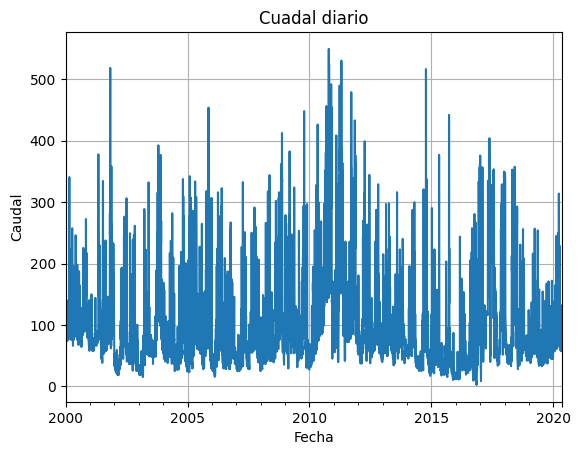

In [43]:
df.set_index("Fecha")["Caudal"].plot()
plt.title("Cuadal diario")
plt.ylabel('Caudal')
plt.grid(True)
plt.show()

Serie Caudal medio mensual

In [44]:
media_mensual["Fecha"] = media_mensual["Año"].astype(str) +'-'+media_mensual["Mes"].astype(str)
media_mensual["Fecha"] = pd.to_datetime(media_mensual['Fecha'], format='%Y-%m')
# Ordenar el DataFrame por fecha
media_mensual = media_mensual.sort_values(by='Fecha')
media_mensual

Mes   Año  Caudal medio mensual      Fecha
0      1  2000           3118.400000 2000-01-01
21     2  2000           3451.500000 2000-02-01
42     3  2000           3218.500000 2000-03-01
63     4  2000           3532.900000 2000-04-01
84     5  2000           3601.400000 2000-05-01
..   ...   ...                   ...        ...
20     1  2020           2297.339438 2020-01-01
41     2  2020           2864.405146 2020-02-01
62     3  2020           5068.366010 2020-03-01
83     4  2020           2603.287125 2020-04-01
104    5  2020            507.978313 2020-05-01

[245 rows x 4 columns]

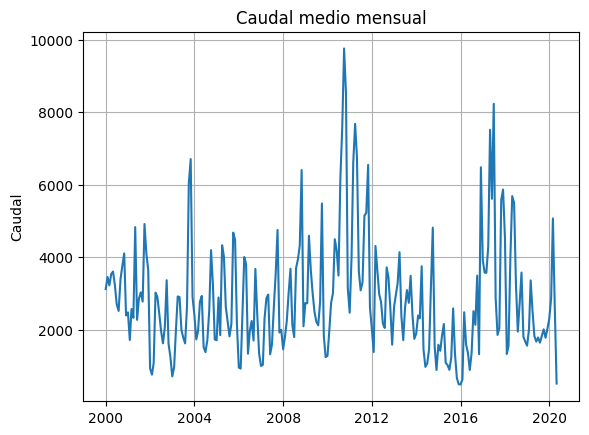

In [45]:
plt.plot(media_mensual["Fecha"],media_mensual["Caudal medio mensual"])
plt.title("Caudal medio mensual")
plt.ylabel('Caudal')
plt.grid(True)
plt.show()

Serie Caudal medio anual

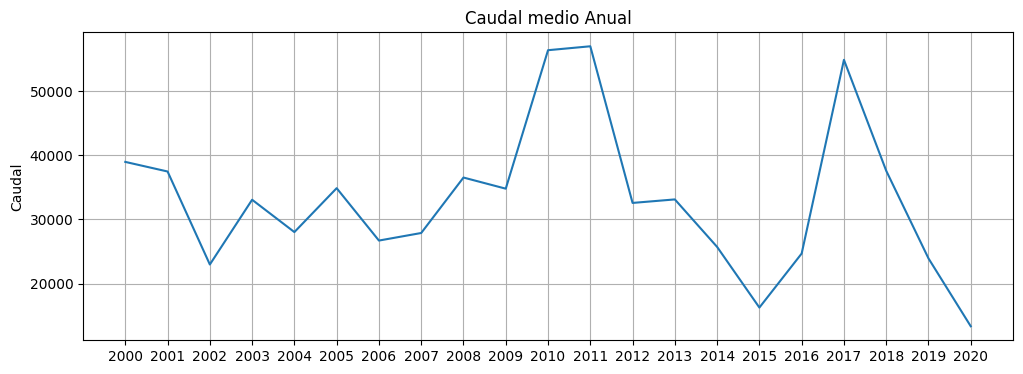

In [46]:
xticks = [i for i in range(2000,2021,1)]
plt.figure(figsize=(12, 4))
plt.plot(media_anual["Año"],media_anual["Caudal medio anual"])
plt.title("Caudal medio Anual")
plt.ylabel('Caudal')
plt.xticks(xticks)
plt.grid(True)
plt.show()

Serie Caudal medio mensual multianual

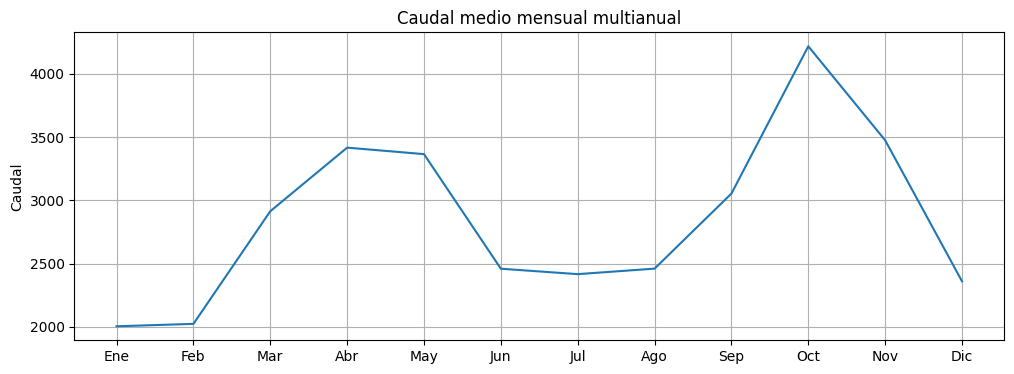

In [47]:
xticks = [i for i in range(1,13,1)]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.figure(figsize=(12, 4))
plt.plot(media_mensual_multianual["Mes"],media_mensual_multianual["Caudal medio mensual multianual"])
plt.title("Caudal medio mensual multianual")
plt.ylabel('Caudal')
plt.xticks(xticks,meses)
plt.grid(True)
plt.show()


b. El correlograma total de cada serie de tiempo

Se graficara con statsmodels

Serie diaria de caudal

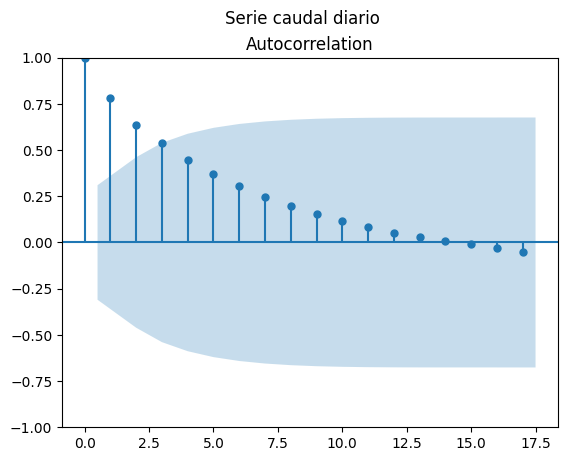

In [48]:
tsp.plot_acf(autocorrelacion1)
plt.suptitle("Serie caudal diario")
plt.show()

Serie Caudal medio mensual

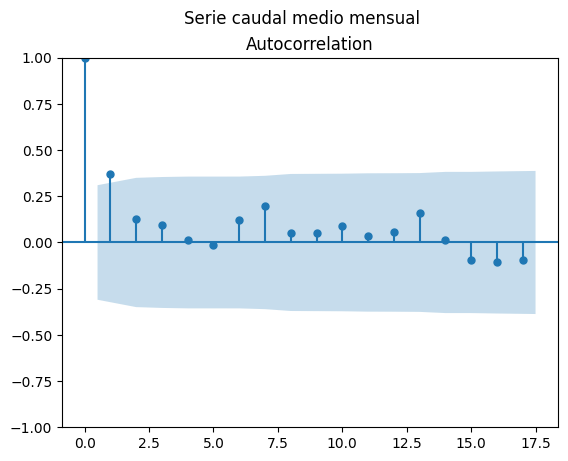

In [49]:
tsp.plot_acf(autocorrelacion2)
plt.suptitle("Serie caudal medio mensual")
plt.show()

Serie Caudal medio anual

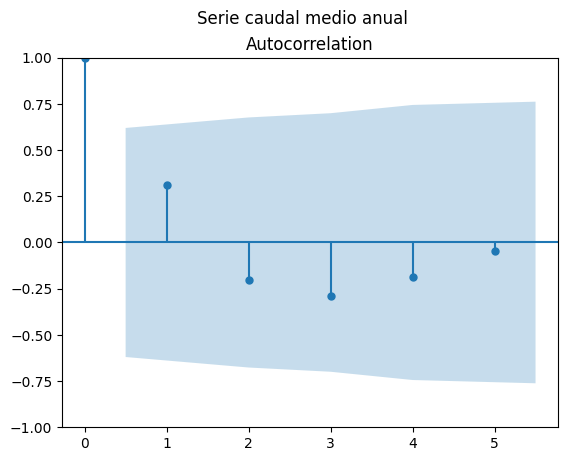

In [50]:
tsp.plot_acf(autocorrelacion3)
plt.suptitle("Serie caudal medio anual")
plt.show()

Serie Caudal medio mensual multianual

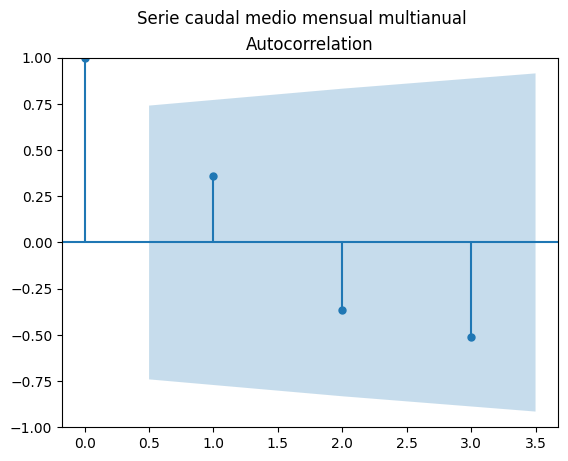

In [51]:
tsp.plot_acf(autocorrelacion4)
plt.suptitle("Serie caudal medio mensual multianual")
plt.show()

c. El correlograma parcial de cada serie de tiempo

Serie diaria de caudal

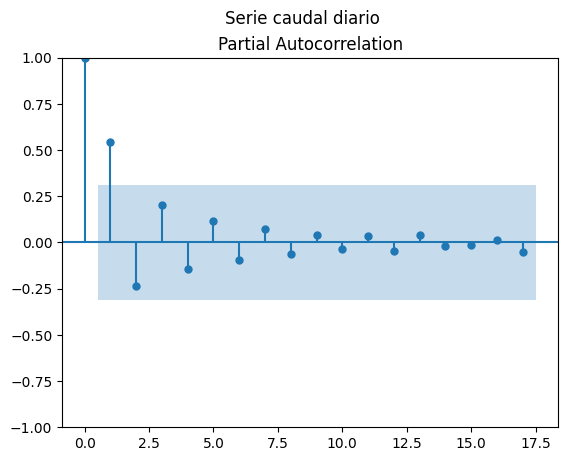

In [52]:
tsp.plot_pacf(autocor_parcial1)
plt.suptitle("Serie caudal diario")
plt.show()

Serie Caudal medio mensual

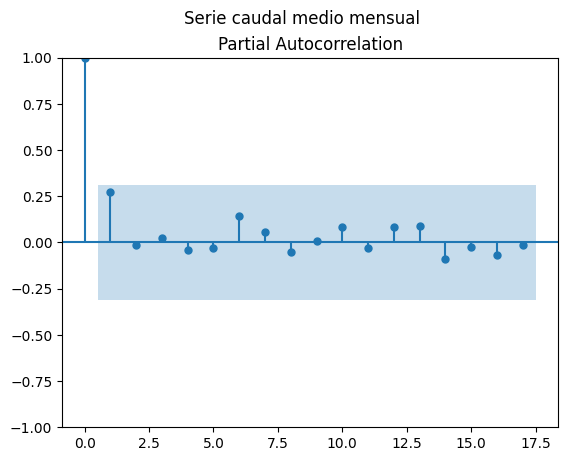

In [53]:
tsp.plot_pacf(autocor_parcial2)
plt.suptitle("Serie caudal medio mensual")
plt.show()

Serie Caudal medio anual

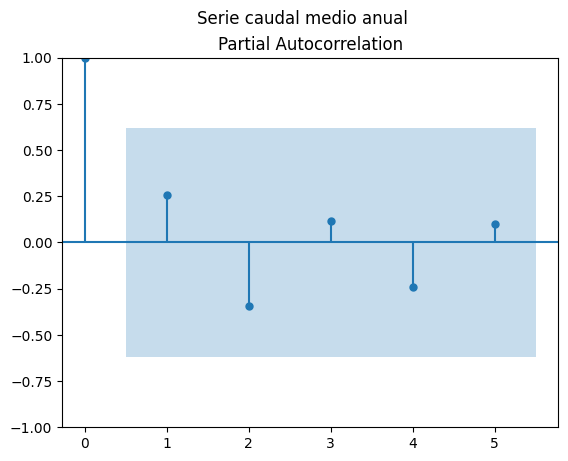

In [54]:
tsp.plot_pacf(autocor_parcial3)
plt.suptitle("Serie caudal medio anual")
plt.show()

Serie Caudal medio mensual multianual

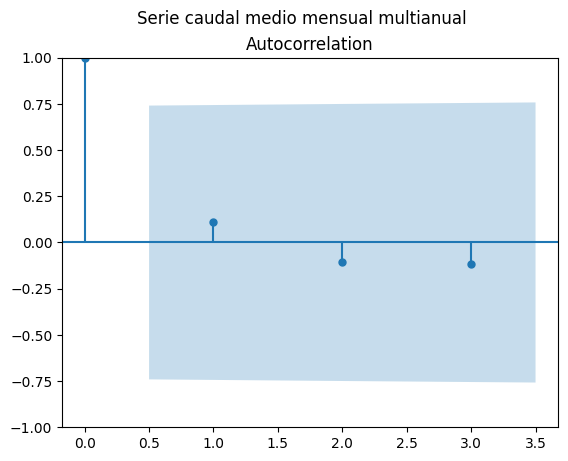

In [55]:
tsp.plot_acf(autocor_parcial4)
plt.suptitle("Serie caudal medio mensual multianual")
plt.show()

d. Varianza y desviación estándar

Las varianzas de cada serie se llaman var entonces, generemos una lista de las varianzas y lo mismo para std.

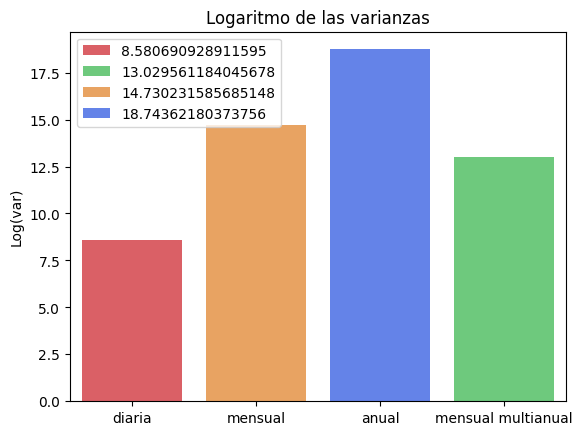

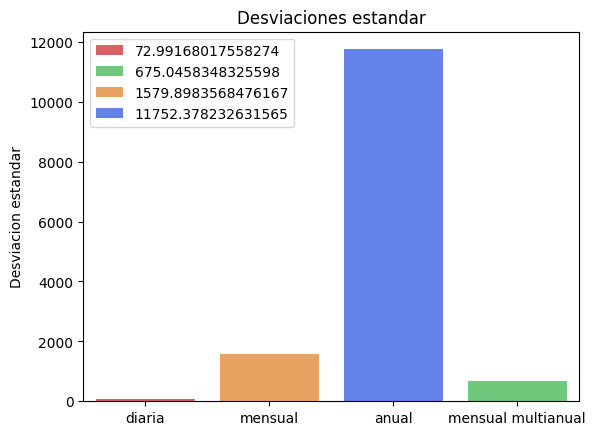

In [56]:
varianzas = np.log(np.array([var1, var2, var3, var4]))
stds = [std1, std2, std3, std4]
nombre = ["diaria", "mensual", "anual", "mensual multianual"]

# Obtener la paleta "bright" de Seaborn y revertirla
paleta_bright = sns.color_palette("bright", len(varianzas))
paleta_bright.reverse()

sns.barplot(x=list(range(len(varianzas))), y=varianzas,hue=varianzas, palette=paleta_bright,alpha = 0.7)
plt.xticks(range(len(varianzas)), nombre)
plt.title("Logaritmo de las varianzas")
plt.ylabel("Log(var)")
plt.legend(loc='upper left')
plt.show()

sns.barplot(x=list(range(len(varianzas))), y=stds,hue=stds, palette=paleta_bright,alpha = 0.7)
plt.xticks(range(len(varianzas)), nombre)
plt.title("Desviaciones estandar")
plt.ylabel("Desviacion estandar")

plt.show()

g. El periodograma para cada serie de tiempo

Serie diaria de caudal

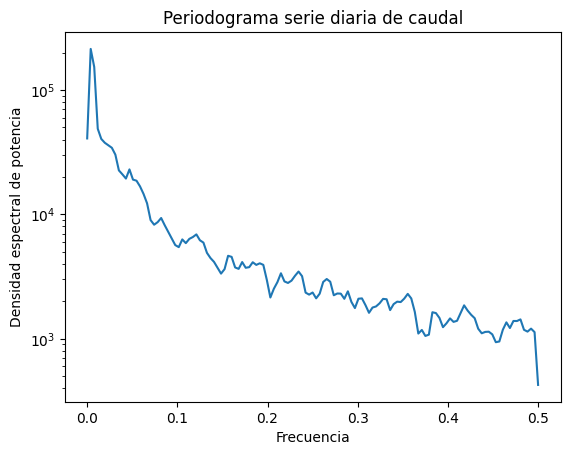

In [57]:
plt.semilogy(frequencies1, psd1)
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma serie diaria de caudal')
plt.show()

Serie Caudal medio mensual

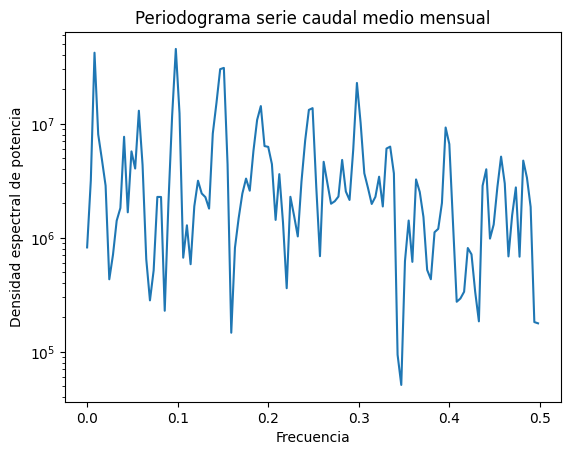

In [58]:
plt.semilogy(frequencies2, psd2)
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma serie caudal medio mensual')
plt.show()

Serie Caudal medio anual

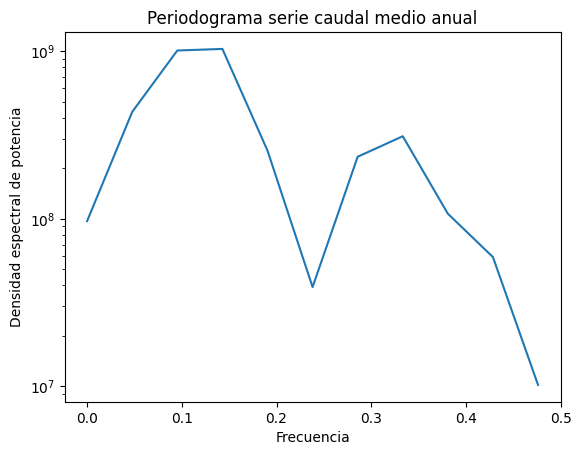

In [59]:
plt.semilogy(frequencies3, psd3)
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma serie caudal medio anual')
plt.show()

Serie Caudal medio mensual multianual

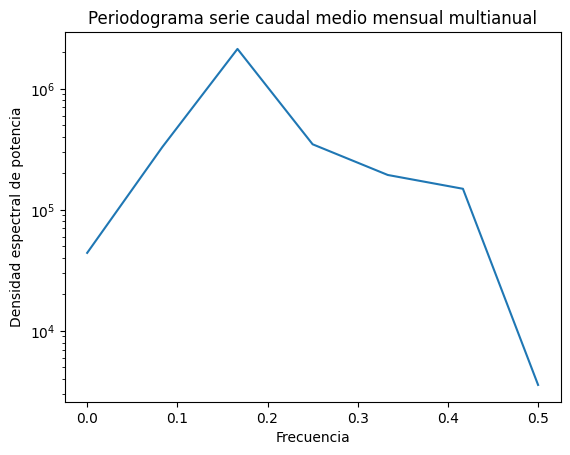

In [60]:
plt.semilogy(frequencies4, psd4)
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma serie caudal medio mensual multianual')
plt.show()

h. Las curvas IMF para cada serie de tiempo obtenidas a partir el procedimiento EMD

Serie diaria de caudal

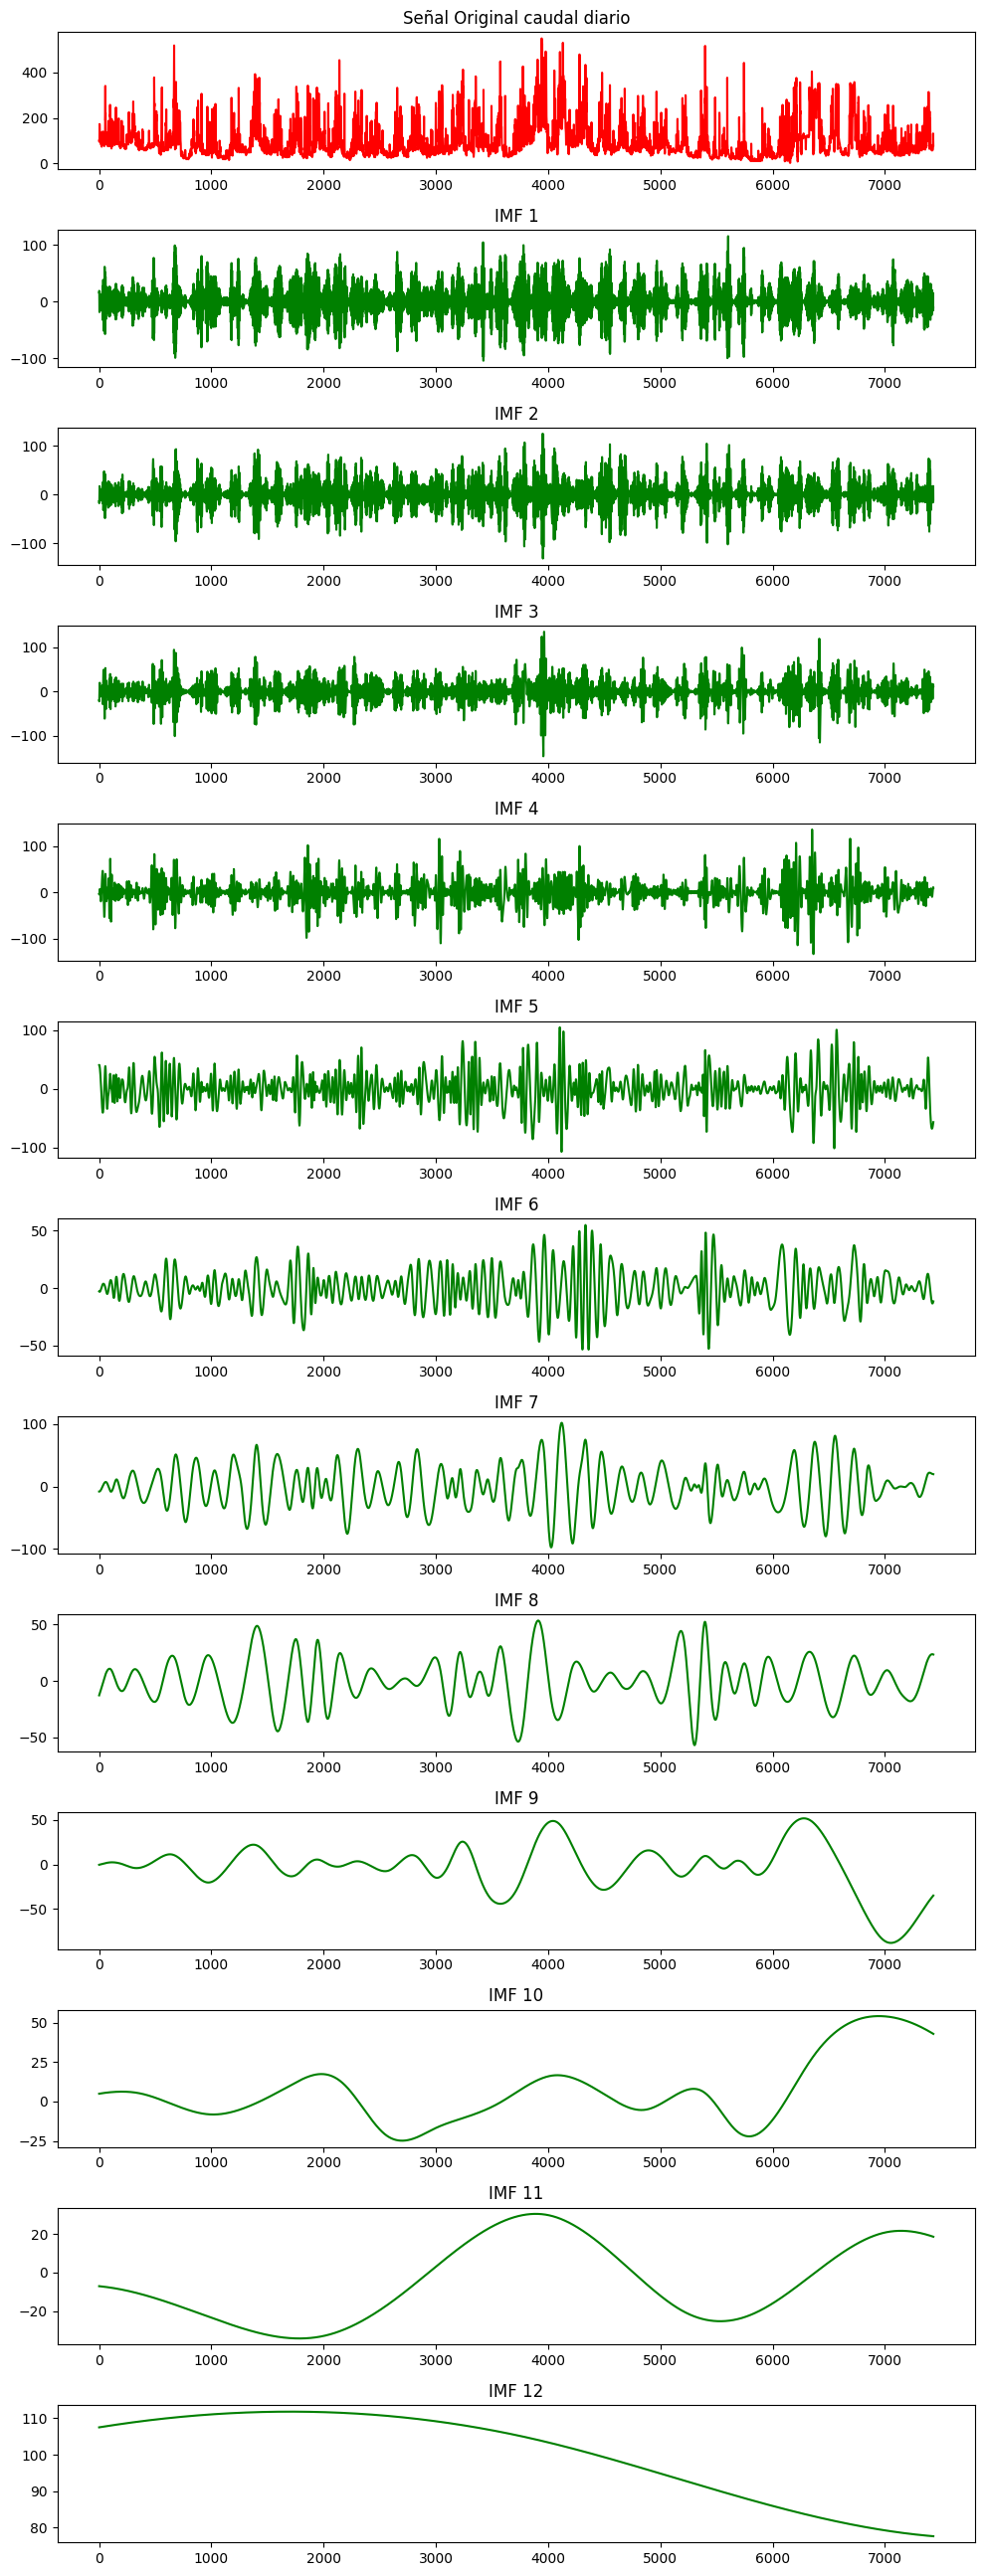

In [61]:
serie1 = df["Caudal"].values
emd = EMD()
IMFs = emd.emd(serie1)

# Graficar las IMF
n_IMFs = IMFs.shape[0]
plt.figure(figsize=(10, 2 * (n_IMFs + 1)))
plt.subplot(n_IMFs + 1, 1, 1)
plt.plot(range(len(serie1)), serie1, 'r')
plt.title('Señal Original caudal diario')

for i, imf in enumerate(IMFs):
    plt.subplot(n_IMFs + 1, 1, i + 2)
    plt.plot(range(len(serie1)), imf, 'g')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

Serie Caudal medio mensual

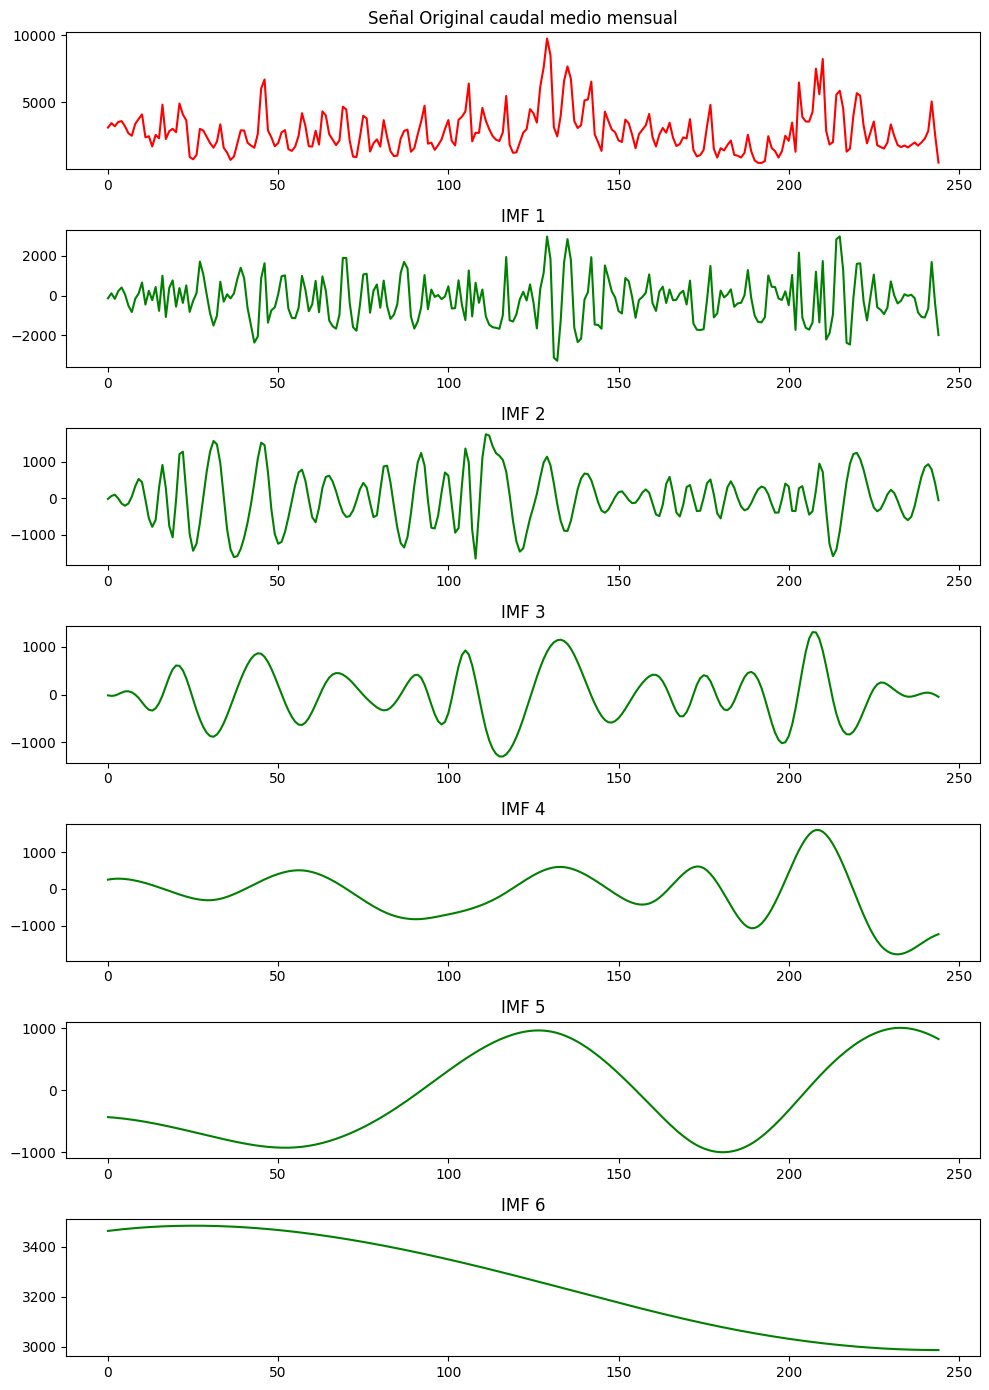

In [62]:
serie2 = media_mensual["Caudal medio mensual"].values
emd = EMD()
IMFs = emd.emd(serie2)

# Graficar las IMF
n_IMFs = IMFs.shape[0]
plt.figure(figsize=(10, 2 * (n_IMFs + 1)))
plt.subplot(n_IMFs + 1, 1, 1)
plt.plot(range(len(serie2)), serie2, 'r')
plt.title('Señal Original caudal medio mensual')

for i, imf in enumerate(IMFs):
    plt.subplot(n_IMFs + 1, 1, i + 2)
    plt.plot(range(len(serie2)), imf, 'g')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

Serie Caudal medio anual

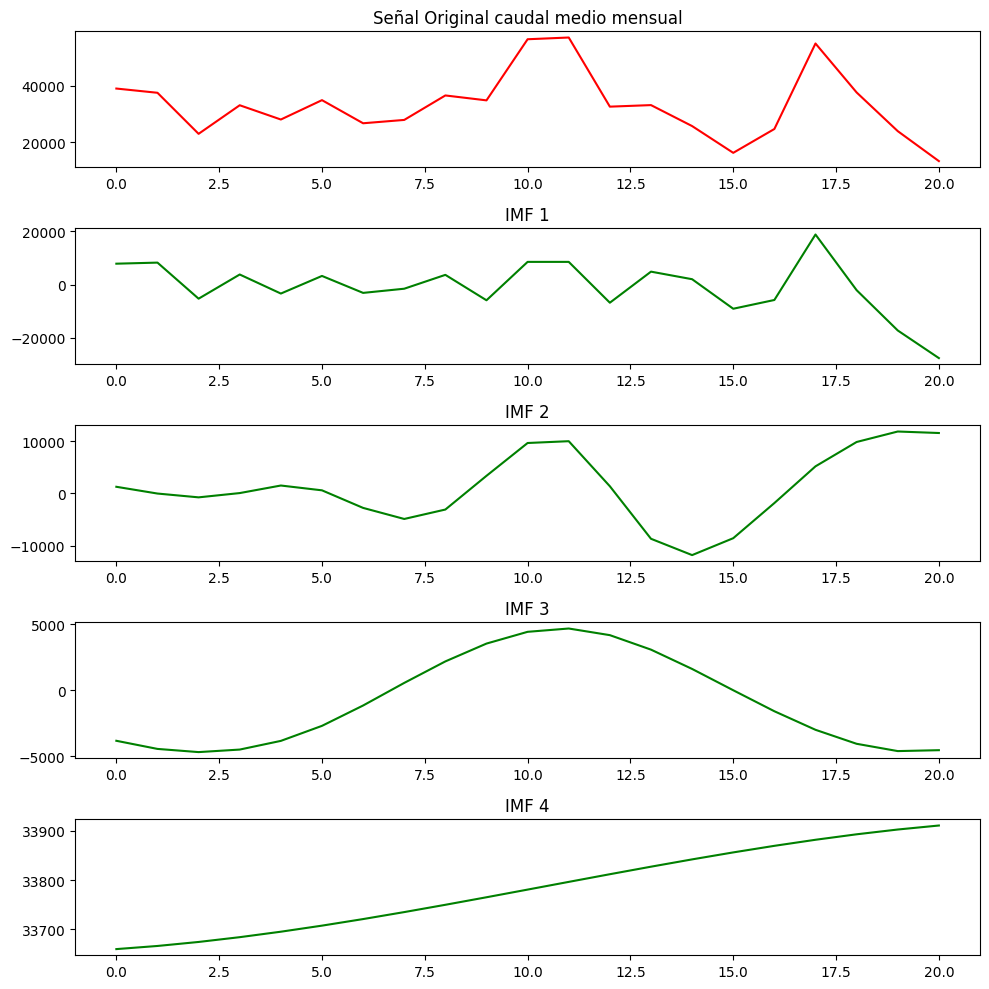

In [63]:
serie3 = media_anual["Caudal medio anual"].values
emd = EMD()
IMFs = emd.emd(serie3)

# Graficar las IMF
n_IMFs = IMFs.shape[0]
plt.figure(figsize=(10, 2 * (n_IMFs + 1)))
plt.subplot(n_IMFs + 1, 1, 1)
plt.plot(range(len(serie3)), serie3, 'r')
plt.title('Señal Original caudal medio mensual')

for i, imf in enumerate(IMFs):
    plt.subplot(n_IMFs + 1, 1, i + 2)
    plt.plot(range(len(serie3)), imf, 'g')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

Serie Caudal medio mensual multianual

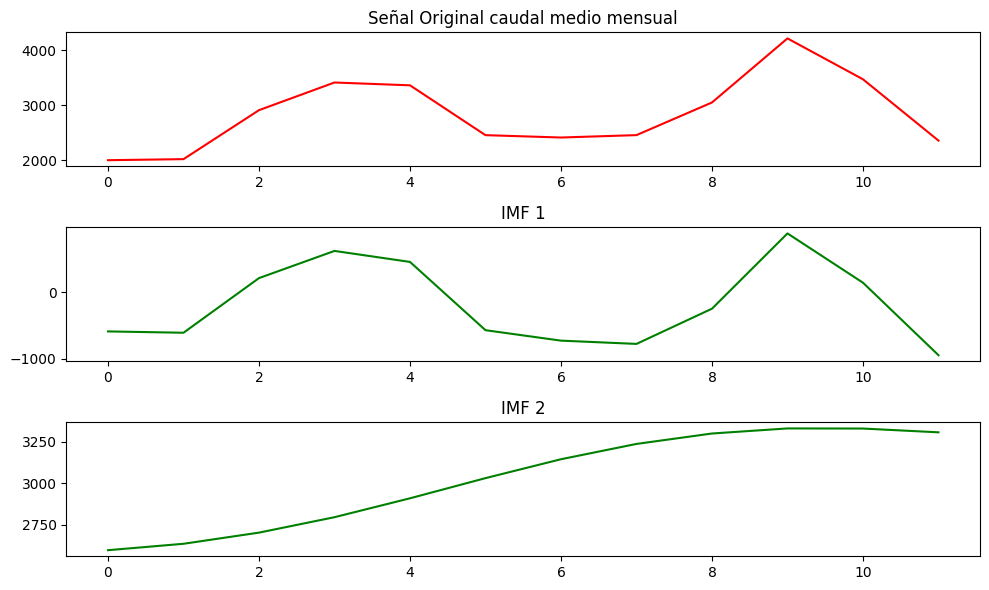

In [64]:
serie4 = media_mensual_multianual["Caudal medio mensual multianual"].values
emd = EMD()
IMFs = emd.emd(serie4)

# Graficar las IMF
n_IMFs = IMFs.shape[0]
plt.figure(figsize=(10, 2 * (n_IMFs + 1)))
plt.subplot(n_IMFs + 1, 1, 1)
plt.plot(range(len(serie4)), serie4, 'r')
plt.title('Señal Original caudal medio mensual')

for i, imf in enumerate(IMFs):
    plt.subplot(n_IMFs + 1, 1, i + 2)
    plt.plot(range(len(serie4)), imf, 'g')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

i. Histograma de cada serie de tiempo

Serie diaria de caudal

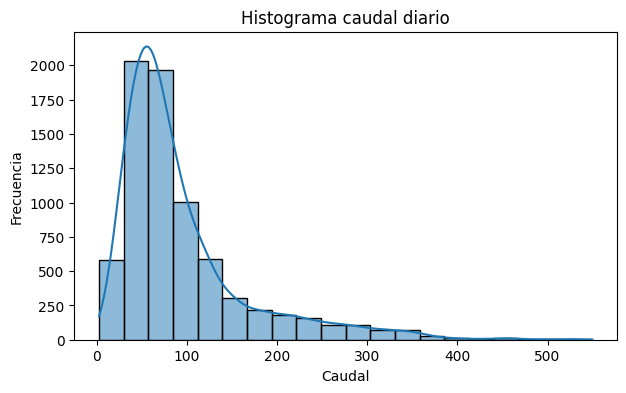

In [65]:
# Crear el histograma usando Seaborn
plt.figure(figsize=(7, 4))
sns.histplot(df["Caudal"], bins=20, kde=True)

# Añadir etiquetas y título
plt.xlabel('Caudal')
plt.ylabel('Frecuencia')
plt.title("Histograma caudal diario")
plt.show()

Serie Caudal medio mensual

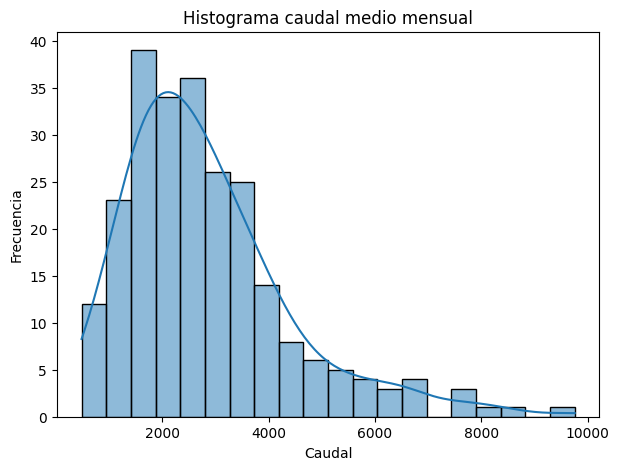

In [66]:
# Crear el histograma usando Seaborn
plt.figure(figsize=(7, 5))
sns.histplot(media_mensual["Caudal medio mensual"], bins=20, kde=True)

# Añadir etiquetas y título
plt.xlabel('Caudal')
plt.ylabel('Frecuencia')
plt.title("Histograma caudal medio mensual")
plt.show()

Serie Caudal medio anual

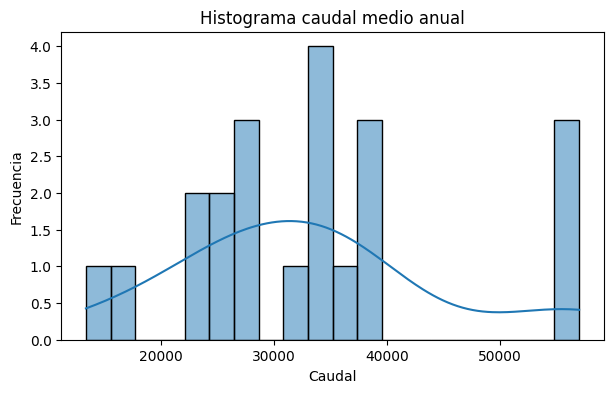

In [67]:
# Crear el histograma usando Seaborn
plt.figure(figsize=(7, 4))
sns.histplot(media_anual["Caudal medio anual"], bins=20, kde=True)

# Añadir etiquetas y título
plt.xlabel('Caudal')
plt.ylabel('Frecuencia')
plt.title("Histograma caudal medio anual")
plt.show()

Serie Caudal medio mensual multianual

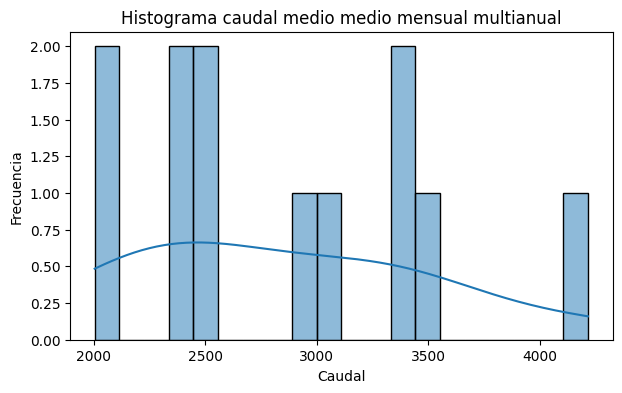

In [68]:
# Crear el histograma usando Seaborn
plt.figure(figsize=(7, 4))
sns.histplot(media_mensual_multianual["Caudal medio mensual multianual"], bins=20, kde=True)

# Añadir etiquetas y título
plt.xlabel('Caudal')
plt.ylabel('Frecuencia')
plt.title("Histograma caudal medio medio mensual multianual")
plt.show()

j. Diagrama de caja y bigotes de cada serie de tiempo

Serie diaria de caudal

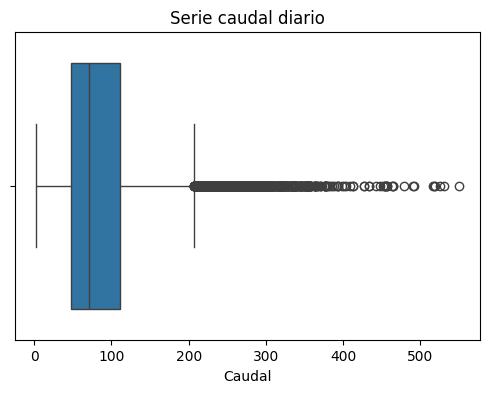

In [69]:
# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(6, 4))
sns.boxplot(x="Caudal", data=df)
# Mostrar el diagrama
plt.title("Serie caudal diario")
plt.show()

Serie Caudal medio mensual

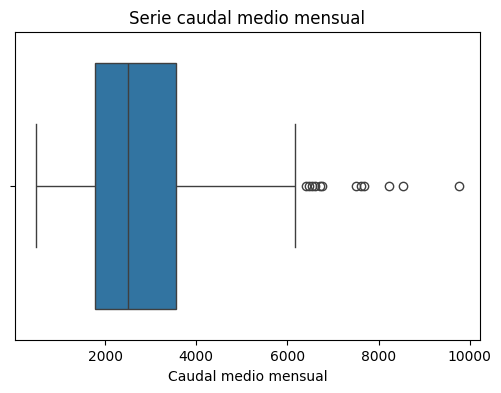

In [70]:
# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(6, 4))
sns.boxplot(x="Caudal medio mensual", data=media_mensual)
# Mostrar el diagrama
plt.title("Serie caudal medio mensual")
plt.show()

Serie Caudal medio anual

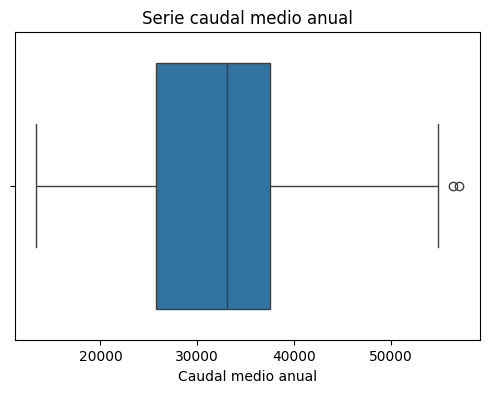

In [71]:
# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(6, 4))
sns.boxplot(x="Caudal medio anual", data=media_anual)
# Mostrar el diagrama
plt.title("Serie caudal medio anual")
plt.show()

Serie Caudal medio mensual multianual

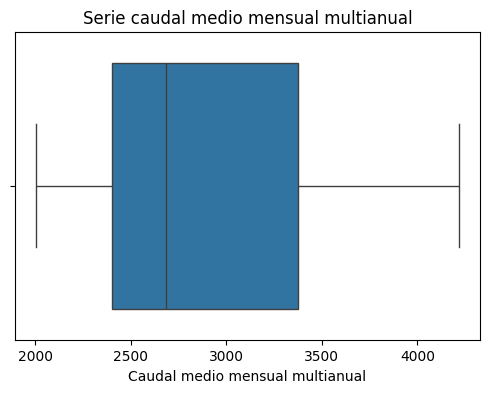

In [72]:
# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(6, 4))
sns.boxplot(x="Caudal medio mensual multianual", data=media_mensual_multianual)
# Mostrar el diagrama
plt.title("Serie caudal medio mensual multianual")
plt.show()

a. Análisis de Saltos

i. Prueba de Pettitt

Para aplicar la hipotesis de Pettitt se contruye una funcion que retorna la posición de los numeros en la seerie y los numeros de la serie donde hay saltos, es decir donde se rechaza la hipotesis nula (La hipotesis nula es no hay saltos o que las medias son iguales en un punto donde se separa la serie de tiempo).

. 

In [73]:
def pettitt_test(series):
    n = len(series)
    k = np.zeros(n)
    for t in range(1, n):
        k[t-1] = sum(np.sign(series[j] - series[i]) for i in range(t) for j in range(t, n))
    k_abs = abs(k)
    p_value = 2 * np.exp((-6 * (k_abs ** 2)) / (n ** 3 + n ** 2))
    significancia = 0.05
    
    posiciones = np.argwhere(p_value < significancia)
    
    if posiciones.size == 0:
        return None, None  
    else:
        return posiciones, series[posiciones]

Serie diaria de caudal

Para la serie diaria no se calculo debido al costo computacional.

In [74]:
#pos1, valor1 = pettitt_test(serie1)

Serie Caudal medio mensual

In [75]:
pos2, valor2 = pettitt_test(serie2)

In [76]:
print(f"La cantidad de saltos es {len(pos2)}")
print(f"Los saltos se encuentran en las posiciones \n{pos2}")

La cantidad de saltos es 15
Los saltos se encuentran en las posiciones 
[[153]
 [154]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [171]]


Serie Caudal medio anual

In [77]:
pos3, valor3 = pettitt_test(serie3)

In [78]:
print(f"La cantidad de saltos es {pos3}")
print(f"Los saltos se encuentran en las posiciones \n{pos3}")

La cantidad de saltos es None
Los saltos se encuentran en las posiciones 
None


Serie Caudal medio mensual multianual

In [79]:
pos4, valor4 = pettitt_test(serie3)
print(f"La cantidad de saltos es {pos3}")
print(f"Los saltos se encuentran en las posiciones \n{pos3}")

La cantidad de saltos es None
Los saltos se encuentran en las posiciones 
None


ii. Prueba de Suma de Rangos

Para realizar esta prueba se utilizara uma función.

In [81]:
def suma_rangos(serie1,serie2):
    
    n1 = len(serie1)
    n2 = len(serie2)

    if n1>n2:
       serie1, serie2 = serie2, serie1
        
    
    serie_union = np.concatenate([serie1,serie2])
    serie_union.sort()
    lista_rango = []
    
    for i in range(0,len(serie_union)):
        
        if serie_union[i] == serie_union[i-1]:
           continue 
        
        conteo = np.count_nonzero(serie_union == serie_union[i])
      
        if conteo == 1:
           lista_rango.append(i+1) 
    
        else: 
           suma = sum(range(i+1, i+conteo+1))/conteo
           for j in range(conteo):
               lista_rango.append(suma) 
    
    suma_rango1 = 0
    for serie in serie1:
        posicion =  np.argmax(serie_union == serie)
        suma_rango1 += lista_rango[posicion]
        
    u = n1*n2+n1*(n1+1)/2 - suma_rango1
    mediau = n1*n2/2
    sigma2u = n1*n2*(n1+n2+1)/12 
    z = (u-mediau)/sigma2u**0.5 
    zalpha = 1.96

    if abs(z)< zalpha:
            print("No hay salto")
    else: 
            print("Si hay salto")
        
    pass

Serie diaria de caudal

Solo dividir en 4 intervalos para realizar la prueba.

In [99]:
nserie1 = len(serie1)
indice1 = nserie1//4

parte1 = serie1[:indice1]
parte2 = serie1[indice1:2*indice1]
parte3 = serie1[2*indice1:3*indice1]
parte4 = serie1[3*indice1:4*indice1]

Posibles permutaciones de las partes 

In [103]:
import itertools

# Definir el conjunto
conjunto = [parte1, parte2, parte3, parte4]

# Generar las combinaciones sin repetición de 2 elementos
combinaciones = list(itertools.combinations(conjunto, 2))

for xt, yt in  combinaciones:
    suma_rangos(xt, yt)


Si hay salto
Si hay salto
Si hay salto
Si hay salto
Si hay salto
Si hay salto


Por lo que, hay diferencia entre las medias de cada cuarta parte de serie.

Serie Caudal medio mensual

Para la serie de caudal solo se divide en  2 partes. 

In [111]:
nserie2 = len(serie2)
indice2 = nserie2//2

parte1 = serie2[:indice2]
parte2 = serie2[indice2:]

In [112]:
suma_rangos(parte1, parte2)

No hay salto


Serie Caudal medio mensual multianual

Para la serie de caudal solo se divide en 2 partes.

In [117]:
nserie3 = len(serie3)
indice3 = nserie3//2

parte1 = serie3[:indice3]
parte2 = serie3[indice3:]

In [118]:
suma_rangos(parte1, parte2)

No hay salto


Serie Caudal medio mensual multianual

In [121]:
nserie4 = len(serie4)
indice4 = nserie4//2

parte1 = serie4[:indice4]
parte2 = serie4[indice4:]
suma_rangos(parte1, parte2)

No hay salto


b. Pruebas de hipótesis de tendencias

i. Prueba de coeficiente de correlación ρ de Spearman

Para ver la correlacion entre el tiempo y el valor del caudal para cada serie de tiempe se enumerara el tiempo. 

Serie diaria de caudal

In [147]:
x = np.array([i for i in range(len(serie1))])

coeficiente, p_valor = stats.spearmanr(x, serie1)

print(f"La correlacion se Spearman para Caudal diario es: {coeficiente:.3f}")

print(f"con un nivel de significancia de {p_valor:.3f}")

La correlacion se Spearman para Caudal diario es: -0.057
con un nivel de significancia de 0.000


Serie Caudal medio mensual

In [148]:
x = np.array([i for i in range(len(serie2))])

coeficiente, p_valor = stats.spearmanr(x, serie2)

print(f"La correlacion se Spearman para Caudal medio mensual es: {coeficiente:.3f}")

print(f"con un nivel de significancia de {p_valor:.3f}")

La correlacion se Spearman para Caudal medio mensual es: -0.064
con un nivel de significancia de 0.317


Serie Caudal medio anual

In [149]:
x = np.array([i for i in range(len(serie3))])

coeficiente, p_valor = stats.spearmanr(x, serie3)

print(f"La correlacion se Spearman para Caudal medio mensual es: {coeficiente:.3f}")

print(f"con un nivel de significancia de {p_valor:.3f}")

La correlacion se Spearman para Caudal medio mensual es: -0.244
con un nivel de significancia de 0.286


Serie Caudal medio mensual multianual

In [151]:
x = np.array([i for i in range(len(serie4))])

coeficiente, p_valor = stats.spearmanr(x, serie4)

print(f"La correlacion se Spearman para Caudal medio mensual es: {coeficiente:.3f}")

print(f"con un nivel de significancia de {p_valor:.3f}")

La correlacion se Spearman para Caudal medio mensual es: 0.413
con un nivel de significancia de 0.183


ii. Prueba de Mann-Kendall

Para realizar esta prueba  se construira una función

In [155]:
# Función para calcular el estadístico S
def calcular_estadistico_S(datos):
    n = len(datos)
    S = 0
    for i in range(n-1):
        for j in range(i+1, n):
            S += np.sign(datos[j] - datos[i])
    return S

# Función para calcular la varianza de S
def calcular_varianza_S(datos):
    n = len(datos)
    unique, counts = np.unique(datos, return_counts=True)
    ties = counts[counts > 1]
    var_s = n * (n-1) * (2*n + 5) - np.sum(ties * (ties-1) * (2*ties + 5))
    var_s /= 18
    return var_s

# Función para calcular el estadístico Z
def calcular_estadistico_Z(S, var_s):
    if S > 0:
        Z = (S - 1) / np.sqrt(var_s)
    elif S == 0:
        Z = 0
    else:
        Z = (S + 1) / np.sqrt(var_s)
    return Z




Serie diaria de caudal

In [157]:
# Cálculo del estadístico S
S = calcular_estadistico_S(serie1)
# Cálculo de la varianza de S
var_s = calcular_varianza_S(serie1)
# Cálculo del estadístico Z
Z = calcular_estadistico_Z(S, var_s)

print(f"Estadístico S: {S}")
print(f"Varianza de S: {var_s}")
print(f"Estadístico Z: {Z}")

# Valor p asociado
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Valor p: {p_value}")

# Veredicto
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una tendencia significativa en la serie de tiempo.")
else:
    print("No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.")

Estadístico S: -1077919.0
Varianza de S: 45620466650.333336
Estadístico Z: -5.046681100226584
Valor p: 4.495507683888178e-07
Se rechaza la hipótesis nula. Hay una tendencia significativa en la serie de tiempo.


Serie Caudal medio mensual

In [159]:
# Cálculo del estadístico S
S = calcular_estadistico_S(serie2)
# Cálculo de la varianza de S
var_s = calcular_varianza_S(serie2)
# Cálculo del estadístico Z
Z = calcular_estadistico_Z(S, var_s)

print(f"Estadístico S: {S}")
print(f"Varianza de S: {var_s}")
print(f"Estadístico Z: {Z}")

# Valor p asociado
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Valor p: {p_value}")

# Veredicto
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una tendencia significativa en la serie de tiempo.")
else:
    print("No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.")

Estadístico S: -1316.0
Varianza de S: 1643950.0
Estadístico Z: -1.025608119884125
Valor p: 0.3050763385124853
No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.


Serie Caudal medio anual

In [160]:
# Cálculo del estadístico S
S = calcular_estadistico_S(serie3)
# Cálculo de la varianza de S
var_s = calcular_varianza_S(serie3)
# Cálculo del estadístico Z
Z = calcular_estadistico_Z(S, var_s)

print(f"Estadístico S: {S}")
print(f"Varianza de S: {var_s}")
print(f"Estadístico Z: {Z}")

# Valor p asociado
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Valor p: {p_value}")

# Veredicto
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una tendencia significativa en la serie de tiempo.")
else:
    print("No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.")

Estadístico S: -42.0
Varianza de S: 1096.6666666666667
Estadístico Z: -1.2380738054414868
Valor p: 0.21568869559132287
No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.


Serie Caudal medio mensual multianual

In [161]:
# Cálculo del estadístico S
S = calcular_estadistico_S(serie4)
# Cálculo de la varianza de S
var_s = calcular_varianza_S(serie4)
# Cálculo del estadístico Z
Z = calcular_estadistico_Z(S, var_s)

print(f"Estadístico S: {S}")
print(f"Varianza de S: {var_s}")
print(f"Estadístico Z: {Z}")

# Valor p asociado
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(Z)))

print(f"Valor p: {p_value}")

# Veredicto
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una tendencia significativa en la serie de tiempo.")
else:
    print("No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.")

Estadístico S: 20.0
Varianza de S: 212.66666666666666
Estadístico Z: 1.302878414515109
Valor p: 0.19261627432960227
No se rechaza la hipótesis nula. No hay una tendencia significativa en la serie de tiempo.
